## Домашнее задание к лекции "Поиск аномалий в данных и работа с пропущенными значениями"

Будем осуществлять работу с непростым набором данных “horse_data.csv” о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

**Переведем информацию из файла “horse_data.names” о нужных столбцах.**

**1. Операция:**
 - 1 = Да, была операция
 - 2 = Лечили без операции

 
**2. Возраст:**
 - 1 = взрослая лошадь
 - 2 = Молодой (< 6 месяцев)
 
**4. Ректальная температура:**
 - линейный
 - в градусах Цельсия.
 - Повышенная температура может возникнуть из-за инфекции.
 - температура может быть снижена, когда животное находится в позднем шоке
 - нормальная температура 37,8.
 - этот параметр обычно меняется по мере развития проблемы
 
 Например, может быть нормальной, затем стать повышенной из-за
 поражений, проходя обратно через нормальный диапазон по мере того, как
 лошадь впадает в шок.
 
 **5. Пульс:**
 - линейный
 - частота пульса в ударах в минуту
 - является отражением состояния сердца: 30-40 – это нормально для взрослых.
 - редко бывает показатель ниже обычного, хотя у спортивных лошадей может быть 20-25
 - животные с болезненными поражениями или страдающие от циркуляторного шока может быть повышенная частота сердечных сокращений

 **6. Частота дыхания:**
 - линейный
 - нормальная от 8 до 10
 - полезность сомнительна из-за больших колебаний

 **7. Температура конечностей:**
 - субъективное указание на периферическое кровообращение
 - возможные значения:
   - 1 = Нормальный
   - 2 = Теплый
   - 3 = Круто
   - 4 = Холодно
 - Холодные конечности указывают на возможный шок
 - горячие конечности должны коррелировать с повышенной ректальной температурой.
 
**11. Боль – субъективная оценка уровня боли лошади.**
 - возможные значения:
   - 1 = тревога, боли нет
   - 2 = депрессия
   - 3 = периодическая легкая боль
   - 4 = периодическая сильная боль
   - 5 = постоянная сильная боль
 - НЕ следует рассматривать как упорядоченную или дискретную переменную!
 - В общем, чем больнее, тем скорее потребуется операция
 - предшествующее лечение боли может в некоторой степени маскировать уровень боли
 
 **23. Результат:**
 - что в итоге случилось с лошадью?
 - возможные значения:
    - 1 = выжила
    - 2 = умерла
    - 3 = была подвергнута эвтаназии

# Подготовка данных.

**Загрузка данных (заголовки отсутствуют). Выбор нужных столбцов по индексу.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\AAA\Desktop\Jupyter\horse_data.csv'
df = pd.read_csv(file_path, header=None, usecols=[0, 1, 3, 4, 5, 6, 10, 22])
print(df.info())
print()
print(df.shape)
print()
print(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    int64 
 2   3       300 non-null    object
 3   4       300 non-null    object
 4   5       300 non-null    object
 5   6       300 non-null    object
 6   10      300 non-null    object
 7   22      300 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB
None

(300, 8)

   0   1      3    4   5  6  10 22
0   2   1  38.50   66  28  3  5  2
1   1   1   39.2   88  20  ?  3  3
2   2   1  38.30   40  24  1  3  1
3   1   9  39.10  164  84  4  2  2
4   2   1  37.30  104  35  ?  ?  2
5   2   1      ?    ?   ?  2  2  1
6   1   1  37.90   48  16  1  3  1
7   1   1      ?   60   ?  3  ?  2
8   2   1      ?   80  36  3  4  3
9   2   9  38.30   90   ?  1  5  1
10  1   1  38.10   66  12  3  3  1
11  2   1  39.10   72  52  2  2  1
12  1   1  37.

**Присваиваем названия столбцам и преобразуем в нужные типы данных.**

In [2]:
df.columns = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 
              'temperature of extremities', 'pain', 'outcome']

df['surgery?'] = pd.to_numeric(df['surgery?'], errors='coerce').astype('float64')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('float64')
df['rectal temperature'] = pd.to_numeric(df['rectal temperature'], errors='coerce').astype('float64')
df['pulse'] = pd.to_numeric(df['pulse'], errors='coerce').astype('float64')
df['respiratory rate'] = pd.to_numeric(df['respiratory rate'], errors='coerce').astype('float64')
df['temperature of extremities'] = pd.to_numeric(df['temperature of extremities'], errors='coerce').astype('float64')
df['pain'] = pd.to_numeric(df['pain'], errors='coerce').astype('float64')
df['outcome'] = pd.to_numeric(df['outcome'], errors='coerce').astype('float64')

# Заменяем все значения "9" (ошибка в исходнике) на "2" в столбце "Age"
df['Age'].replace(9, 2, inplace=True)


print(df.head(20))

    surgery?  Age  rectal temperature  pulse  respiratory rate  \
0        2.0  1.0                38.5   66.0              28.0   
1        1.0  1.0                39.2   88.0              20.0   
2        2.0  1.0                38.3   40.0              24.0   
3        1.0  2.0                39.1  164.0              84.0   
4        2.0  1.0                37.3  104.0              35.0   
5        2.0  1.0                 NaN    NaN               NaN   
6        1.0  1.0                37.9   48.0              16.0   
7        1.0  1.0                 NaN   60.0               NaN   
8        2.0  1.0                 NaN   80.0              36.0   
9        2.0  2.0                38.3   90.0               NaN   
10       1.0  1.0                38.1   66.0              12.0   
11       2.0  1.0                39.1   72.0              52.0   
12       1.0  1.0                37.2   42.0              12.0   
13       2.0  2.0                38.0   92.0              28.0   
14       1

In [3]:
# Уникальные значения в каждом столбце. Убидимся, что значения соответствуют описанию “horse_data.names”.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце '{column}':")
    print(unique_values)
    print()

Уникальные значения в столбце 'surgery?':
[ 2.  1. nan]

Уникальные значения в столбце 'Age':
[1. 2.]

Уникальные значения в столбце 'rectal temperature':
[38.5 39.2 38.3 39.1 37.3  nan 37.9 38.1 37.2 38.  38.2 37.6 37.5 39.4
 39.9 38.4 38.6 37.8 37.7 39.  35.4 38.9 37.4 40.3 37.  39.7 38.7 36.4
 38.8 39.6 36.8 39.5 36.5 36.  37.1 39.3 36.1 36.6 40.8 36.9 40. ]

Уникальные значения в столбце 'pulse':
[ 66.  88.  40. 164. 104.  nan  48.  60.  80.  90.  72.  42.  92.  76.
  96. 128.  64. 110. 130. 108. 100. 112.  52. 146. 150. 120. 140.  84.
  46. 114. 160.  54.  56.  38.  98.  50.  44.  70.  78.  49.  30. 136.
 132.  65.  86. 129.  68.  36.  45. 124. 184.  75.  82.]

Уникальные значения в столбце 'respiratory rate':
[28. 20. 24. 84. 35. nan 16. 36. 12. 52. 48. 21. 60. 34. 42. 30. 96. 72.
 15. 44. 32. 22. 18. 80. 40. 10. 51. 68. 66.  9. 14. 90.  8. 23. 58. 13.
 70. 26. 88. 25. 50.]

Уникальные значения в столбце 'temperature of extremities':
[ 3. nan  1.  4.  2.]

Уникальные значения в с

**Удаляем строки.**  
В которых отсутствуют значения сразу в 3 столбцах ('rectal temperature', 'pulse' и 'respiratory rate'), т.к. это слишком "битые" данные.

In [4]:
df2 = df.copy()  
df2.dropna(subset=['rectal temperature', 'pulse', 'respiratory rate'], how='all', inplace=True)

print(df.shape)
print(df2.shape)

(300, 8)
(285, 8)


# Обработка данных.

## Работа с выбросами.

Определяем выбросы для столбцов с температурой, частотой дыхания и пульсом через IQR. В остальных столбцах выбросов быть не может.

После вывода строк с выбросами, мы видим значения температуры (35.4 - 40.8), пульса (160 - 184) и частоты дыхания (66 - 96). 

Основываясь на данных из открытых источников о физиологических показателях лошадей, можно сказать, что почти все значения выбросов реальны и не являются выбросами. Просто принимают крайние значения.



|*Физиалогические показатели лошади*| Взрослые (норма) | Жеребята (норма) | Нижний предел | Верхний предел |
|----------|----------|----------|----------|----------|
| Температура | 37.2 - 38.3 | 37.5 - 38.5 | 36 | 41 |
| Пульс | 20 - 40 | 80 - 120 | 15 | 240 |
| Частота дыхания | 8 - 24 | 20 - 40 | 6 | 100 |

In [5]:
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.7 * iqr) # коэффициент 1,7 - аналог 3-х σ
    upper_bound = q3 + (1.7 * iqr)
    return (column < lower_bound) | (column > upper_bound)

outliers_rectal_temp = detect_outliers(df2['rectal temperature'])
outliers_pulse = detect_outliers(df2['pulse'])
outliers_respiratory_rate = detect_outliers(df2['respiratory rate'])

# Вывод строк с выбросами
print("Строки с выбросами в столбце 'rectal temperature':")
print(df2[outliers_rectal_temp])
print()
print("\nСтроки с выбросами в столбце 'pulse':")
print(df2[outliers_pulse])
print()
print("Строки с выбросами в столбце 'respiratory rate':")
print(df2[outliers_respiratory_rate])

Строки с выбросами в столбце 'rectal temperature':
     surgery?  Age  rectal temperature  pulse  respiratory rate  \
20        1.0  1.0                39.9   72.0              60.0   
44        1.0  1.0                35.4  140.0              24.0   
54        2.0  1.0                40.3  114.0              36.0   
75        1.0  2.0                39.7  100.0               NaN   
80        1.0  1.0                36.4   98.0              35.0   
91        2.0  1.0                40.3  114.0              36.0   
118       1.0  1.0                36.5   78.0              30.0   
141       2.0  1.0                36.0   42.0              30.0   
238       2.0  1.0                36.1   88.0               NaN   
251       2.0  1.0                36.6   42.0              18.0   
259       1.0  1.0                40.8   72.0              42.0   
281       2.0  1.0                40.0   78.0               NaN   
298       1.0  1.0                36.5  100.0              24.0   

     tempe

Поэтому вручную зададим границы выбросов. Если какое-то значение выйдет за них, заменим его на ближайшее допустимое.

In [6]:
# Метод .clip() в Pandas используется для ограничения значений. Все значения, которые меньше или больше, будут заменены.

df2['rectal temperature'] = df2['rectal temperature'].clip(lower=36, upper=41)
df2['pulse'] = df['pulse'].clip(lower=15, upper=240)
df2['respiratory rate'] = df2['respiratory rate'].clip(lower=6, upper=100)

print(df2['rectal temperature'].min(), df2['rectal temperature'].max())
print(df2['pulse'].min(), df2['pulse'].max())
print(df2['respiratory rate'].min(), df2['respiratory rate'].max())
print(df2.shape)

36.0 40.8
30.0 184.0
8.0 96.0
(285, 8)


## Работа с пропусками.

In [7]:
# Кол-во пропусков в столбцах
print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature            45
pulse                          9
respiratory rate              43
temperature of extremities    47
pain                          47
outcome                        1
dtype: int64


Заполнение пропусков средним значением искажает данные, т.к. данные распределены ненормально. Заполнение с помощью медианы - не отражает реальной картины. 
Поэтому я решил поэтапно заполнить пропуски, основываясь на связи рядов данных.

Для начала выделим самые важные столбцы - температура, пульс и частота дыхания. По логике, эти 3 столбца должны иметь хорошую корреляцию, но тесты показывают слабую корреляцию. Это может быть связанно с малым количеством данных или с тем, что данные могли быть плохо сгенерированны.

In [8]:
# Расчет коэффициента корреляции Спирмена

spearman_corr = df2['rectal temperature'].corr(df2['pulse'], method='spearman')
spearman_corr2 = df2['rectal temperature'].corr(df2['respiratory rate'], method='spearman')
spearman_corr3 = df2['pulse'].corr(df2['respiratory rate'], method='spearman')

print(f"Коэффициент корреляции Спирмена между 'rectal temperature' и 'pulse': {spearman_corr}")
print(f"Коэффициент корреляции Спирмена между 'rectal temperature' и 'respiratory rate': {spearman_corr2}")
print(f"Коэффициент корреляции Спирмена между 'respiratory rate' и 'pulse': {spearman_corr3}")

Коэффициент корреляции Спирмена между 'rectal temperature' и 'pulse': 0.23615187291479578
Коэффициент корреляции Спирмена между 'rectal temperature' и 'respiratory rate': 0.23077156863115927
Коэффициент корреляции Спирмена между 'respiratory rate' и 'pulse': 0.4724634525261959


Столбец 'pulse' будет стартовой точкой, т.к. имеет мало пропусков, мало выбросов и хороший коэффициент корреляции с 'respiratory rate'. 

Чтобы заполнить пропуски пульса, я найду среднее отношение пульса к частоте дыхания (ЧД), а затем помножу ЧД на этот коэффициент в местах пропусков.
Чтобы повысить точность, разделю данные на 2 группы: выжившие и не выжившие. 

In [9]:
# Рассчитываем новый столбц
df2['pulse to respiration ratio'] = df2['pulse'] / df2['respiratory rate']

# Разделяем DataFrame на две группы в зависимости от 'outcome'
alife = df2[df2['outcome'] == 1]
not_alive = df2[df2['outcome'] != 1]

# Рассчитываем средние значения для всех новых столбцов для каждой группы
avg_pulse_respiration_alive = alife['pulse to respiration ratio'].mean()
avg_pulse_respiration_not_alive = not_alive['pulse to respiration ratio'].mean()


# Выводим результаты
print("Среднее отношение пульса к частоте дыхания для группы outcome = 1:", avg_pulse_respiration_alive)
print("Среднее отношение пульса к частоте дыхания для группы outcome != 1:", avg_pulse_respiration_not_alive)

Среднее отношение пульса к частоте дыхания для группы outcome = 1: 2.6431764960257604
Среднее отношение пульса к частоте дыхания для группы outcome != 1: 2.9799656532346246


In [10]:
# Замена пропусков в 'pulse'

def replace_pulse(row):
    if pd.isna(row['pulse']):
        if row['outcome'] == 1:
                return row['respiratory rate'] * avg_pulse_respiration_alive
        else:
             return row['respiratory rate'] * avg_pulse_respiration_not_alive
    else:
        return row['pulse']
    
# Применяем функцию replace_pulse для замены пропусков в 'pulse'
df2['pulse'] = df2.apply(replace_pulse, axis=1)

print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature            45
pulse                          3
respiratory rate              43
temperature of extremities    47
pain                          47
outcome                        1
pulse to respiration ratio    49
dtype: int64


Оставшиеся пропуски заменим на значения моды, т.к. в этих строках отсутствуют значения в столбце 'respiratory rate'.

In [11]:
pulse_mode = df2['pulse'].mode().iloc[0] if not df2['pulse'].mode().empty else np.nan

df2['pulse'].fillna(pulse_mode, inplace=True)

print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature            45
pulse                          0
respiratory rate              43
temperature of extremities    47
pain                          47
outcome                        1
pulse to respiration ratio    49
dtype: int64


Теперь заполним пропуски в 'respiratory rate' таким же способом. 

In [12]:
def replace_respiration(row):
    if pd.isna(row['respiratory rate']):
        if row['outcome'] == 1:
            return row['pulse'] / avg_pulse_respiration_alive
        else:
            return row['pulse'] / avg_pulse_respiration_not_alive
    else:
        return row['respiratory rate']

df2['respiratory rate'] = df2.apply(replace_respiration, axis=1)

print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature            45
pulse                          0
respiratory rate               0
temperature of extremities    47
pain                          47
outcome                        1
pulse to respiration ratio    49
dtype: int64


Для замены пропусков в 'rectal temperature' данный способ не подойдет, т.к. у этого столбца очень слабая корреляция с остальными столбцами, что может привести к аномальным значениям. Например, температура тела в 16°.

Поскольку распределение данных температуры близко к нормальному, заменим пропуски на значение среднего арифметического для каждой группы.  

In [13]:
# Вычисляем среднее арифметическое для групп выжившие и не выжившие

mean_temp_alive = df[df['outcome'] == 1]['rectal temperature'].mean()
mean_temp_not_alive = df[df['outcome'] != 1]['rectal temperature'].mean()

def replace_temperature(row):
    if pd.isna(row['rectal temperature']):
        if row['outcome'] == 1:
            return mean_temp_alive
        else:
            return mean_temp_not_alive
    return row['rectal temperature']

# Применяем функцию replace_temperature для замены пропусков в 'rectal temperature'
df2['rectal temperature'] = df2.apply(replace_temperature, axis=1)

# Выводим результат
print(df2.isna().sum())

surgery?                       1
Age                            0
rectal temperature             0
pulse                          0
respiratory rate               0
temperature of extremities    47
pain                          47
outcome                        1
pulse to respiration ratio    49
dtype: int64


Для заполнения пропусков в 'temperature of extremities' воспользуемся тем же методом, что и с 'respiratory rate', т.к. температура конечностей тоже имеет хорошую корреляцию с пульсом. Даже лучше чем с температурой тела.

In [14]:
# Расчет коэффициента корреляции Спирмена
spearman_corr4 = df2['temperature of extremities'].corr(df2['pulse'], method='spearman')
spearman_corr5 = df2['temperature of extremities'].corr(df2['rectal temperature'], method='spearman')

print(f"Коэффициент корреляции Спирмена между 'temperature of extremities' и 'pulse': {spearman_corr4}")
print(f"Коэффициент корреляции Спирмена между 'temperature of extremities' и 'rectal temperature': {spearman_corr5}")

Коэффициент корреляции Спирмена между 'temperature of extremities' и 'pulse': 0.35056711140045627
Коэффициент корреляции Спирмена между 'temperature of extremities' и 'rectal temperature': 0.0687371932881639


In [15]:
# Рассчитываем новые столбцы
df2['pulse to temperature of extremities'] = df2['pulse'] / df2['temperature of extremities']

# Рассчитываем средние значения
avg_pulse_extremities = df2['pulse to temperature of extremities'].mean()

print("Среднее отношение пульса к температурt конечностей", avg_pulse_extremities)

Среднее отношение пульса к температурt конечностей 37.89693600736741


In [16]:
# Замена пропусков в 'temperature of extremities'
# Функци возвращает значения от 1 до 4, т.к. это ограничение столбца. 
def replace_extremities(row):
    if pd.isna(row['temperature of extremities']):
        temp_ext = round(row['pulse'] / avg_pulse_extremities)
        if temp_ext > 4:
            return 4
        elif temp_ext < 1:
            return 1
        else:
            return temp_ext
    return row['temperature of extremities']

# Применяем функцию для замены пропусков
df2['temperature of extremities'] = df2.apply(replace_extremities, axis=1)

print(df2.isna().sum())

surgery?                                1
Age                                     0
rectal temperature                      0
pulse                                   0
respiratory rate                        0
temperature of extremities              0
pain                                   47
outcome                                 1
pulse to respiration ratio             49
pulse to temperature of extremities    47
dtype: int64


Для заполнения пропусков в столбце 'pain' проверим корреляцию с остальными столбцами.

In [17]:
# Расчет коэффициента корреляции Спирмена
columns_to_compare = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'outcome']

# Создание словаря для хранения коэффициентов корреляции
correlations = {}

# Вычисление коэффициента корреляции Спирмена для каждого столбца с 'pain'
for column in columns_to_compare:
    spearman_corr = df['pain'].corr(df[column], method='spearman')
    correlations[column] = spearman_corr

# Вывод результатов
for column, corr in correlations.items():
    print(f"Коэффициент корреляции Спирмена между 'pain' и '{column}': {corr:.4f}")

Коэффициент корреляции Спирмена между 'pain' и 'surgery?': -0.3138
Коэффициент корреляции Спирмена между 'pain' и 'Age': 0.0347
Коэффициент корреляции Спирмена между 'pain' и 'rectal temperature': -0.0953
Коэффициент корреляции Спирмена между 'pain' и 'pulse': 0.3434
Коэффициент корреляции Спирмена между 'pain' и 'respiratory rate': 0.1940
Коэффициент корреляции Спирмена между 'pain' и 'temperature of extremities': 0.2718
Коэффициент корреляции Спирмена между 'pain' и 'outcome': 0.3413


Опять видим достаточную кореляцию с 'pulse', поэтому заполним также как 'temperature of extremities'.

In [18]:
# Рассчитываем новые столбцы
df2['pulse to pain'] = df2['pulse'] / df2['pain']

# Рассчитываем средние значения
avg_pulse_pain = df2['pulse to pain'].mean()

print("Среднее отношение пульса к боли", avg_pulse_pain)

Среднее отношение пульса к боли 29.491500882322008


In [19]:
# Замена пропусков в 'pain'
# Функци возвращает значения от 1 до 5, т.к. это ограничение столбца.
def replace_pain(row):
    if pd.isna(row['pain']):
        pain_ = round(row['pulse'] / avg_pulse_pain)
        if pain_ > 5:
            return 5
        elif pain_ < 1:
            return 1
        else:
            return pain_
    return row['pain']

# Применяем функцию для замены пропусков
df2['pain'] = df2.apply(replace_pain, axis=1)

print(df2.isna().sum())

surgery?                                1
Age                                     0
rectal temperature                      0
pulse                                   0
respiratory rate                        0
temperature of extremities              0
pain                                    0
outcome                                 1
pulse to respiration ratio             49
pulse to temperature of extremities    47
pulse to pain                          47
dtype: int64


Пропуски остались только в 2-х столбцах одной строки.

Имея множество данных в таблице, можно предсказать вероятные значения в 'surgery' и 'outcome'.

In [22]:
# Обнуляем NaN в новых столбцах
df2['pulse to respiration ratio'] = df2['pulse'] / df2['respiratory rate']
df2['pulse to temperature of extremities'] = df2['pulse'] / df2['temperature of extremities']
df2['pulse to pain'] = df2['pulse'] / df2['pain']

# Выводим строки с NaN
rows_with_nan = df2[df2.isna().any(axis=1)]

print("Строки с пропущенными значениями (NaN):")
print(rows_with_nan)

Строки с пропущенными значениями (NaN):
     surgery?  Age  rectal temperature  pulse  respiratory rate  \
132       NaN  1.0                38.0   48.0              20.0   

     temperature of extremities  pain  outcome  pulse to respiration ratio  \
132                         3.0   4.0      NaN                         2.4   

     pulse to temperature of extremities  pulse to pain  
132                                 16.0           12.0  


In [23]:
# Расчет коэффициента корреляции Спирмена
spearman_corr6 = df2['outcome'].corr(df2['surgery?'], method='spearman')

print(f"Коэффициент корреляции Спирмена между 'outcome' и 'surgery?': {spearman_corr6}")

Коэффициент корреляции Спирмена между 'outcome' и 'surgery?': -0.14498254920126963


Корреляция между этими столбцами слабая, поэтому проведем расчеты вероятных значений в этих столбцах не зависимо друг от друга. 

Алгоритм расчета:

- Создадим столбцы "веса", перемножив все столбцы, кроме искомых;
- Вычислим средний "вес";
- Делим данные на 2 группы (больше среднего и меньше или равно среднему);
- Рассчитаем средние для каждой группы в столбцах 'surgery?' и 'outcome';
- Заменяем пропуски на среднее значение, в зависомости от "веса". 

In [26]:
# Создание столбца "веса"

df2['weight'] = df2['Age'] * df2['rectal temperature'] * df2['pulse'] * df2['respiratory rate'] * df2['temperature of extremities'] * df2['pain']

# Значение среднего "веса"
mean_weight = df2['weight'].mean()

# Создаем две группы данных
group1 = df2[df2['weight'] > mean_weight]
group2 = df2[df2['weight'] <= mean_weight]

# Рассчитываем среднее значение и моду для каждой группы в столбцах 'surgery?' и 'outcome'
mean_surgery_group1 = group1['surgery?'].mean()
mean_surgery_group2 = group2['surgery?'].mean()
mean_outcome_group1 = group1['outcome'].mean()
mean_outcome_group2 = group2['outcome'].mean()

mode_surgery_group1 = group1['surgery?'].mode()[0]
mode_surgery_group2 = group2['surgery?'].mode()[0]
mode_outcome_group1 = group1['outcome'].mode()[0]
mode_outcome_group2 = group2['outcome'].mode()[0]

print("Группа 1 (вес больше среднего значения):")
print("\n")
print(f"Среднее значение 'surgery': {mean_surgery_group1}")
print(f"Мода 'surgery': {mode_surgery_group1}")
print(f"Среднее значение 'outcome': {mean_outcome_group1}")
print(f"Мода 'outcome': {mode_outcome_group1}")
print("\n")

print("Группа 2 (вес меньше или равен среднему значению):")
print("\n")
print(f"Среднее значение 'surgery': {mean_surgery_group2}")
print(f"Мода 'surgery': {mode_surgery_group2}")
print(f"Среднее значение 'outcome': {mean_outcome_group2}")
print(f"Мода 'outcome': {mode_outcome_group2}")

Группа 1 (вес больше среднего значения):


Среднее значение 'surgery': 1.3012048192771084
Мода 'surgery': 1.0
Среднее значение 'outcome': 1.8313253012048192
Мода 'outcome': 2.0


Группа 2 (вес меньше или равен среднему значению):


Среднее значение 'surgery': 1.4427860696517414
Мода 'surgery': 1.0
Среднее значение 'outcome': 1.4427860696517414
Мода 'outcome': 1.0


In [27]:
# Замена пропусков в 'surgery' и 'outcome'

def replace_surgery_outcome(row):
    if row['weight'] > mean_weight:
        if pd.isnull(row['surgery?']):
            row['surgery?'] = mode_surgery_group1
        if pd.isnull(row['outcome']):
            row['outcome'] = mode_outcome_group1
    else:
        if pd.isnull(row['surgery?']):
            row['surgery?'] = mode_surgery_group2
        if pd.isnull(row['outcome']):
            row['outcome'] = mode_outcome_group2
    return row

# Применение функции к DataFrame
df2 = df2.apply(replace_surgery_outcome, axis=1)

# Выводим результат
print(df2.isna().sum())

surgery?                               0
Age                                    0
rectal temperature                     0
pulse                                  0
respiratory rate                       0
temperature of extremities             0
pain                                   0
outcome                                0
pulse to respiration ratio             0
pulse to temperature of extremities    0
pulse to pain                          0
weight                                 0
dtype: int64


## Итоги.

После заполнения пропусков сравним основные статистики новой и старой таблиц, а также их диаграммы.

In [28]:
# Обозначаем интересующие нас столбцы
columns_of_interest = [
    'surgery?', 'Age', 'rectal temperature', 'pulse', 
    'respiratory rate', 'temperature of extremities', 
    'pain', 'outcome'
]

# Функция для вычисления статистических показателей
def calculate_statistics(df, columns):
    stats = {}
    for column in columns:
        stats[column] = {
            'min': df[column].min(),
            'max': df[column].max(),
            'range': df[column].max() - df[column].min(),
            'mean': df[column].mean(),
            'median': df[column].median(),
            'mode': df[column].mode()[0] if not df[column].mode().empty else np.nan
        }
    return pd.DataFrame(stats)

# Вычисляем статистику для обоих DataFrame
stats_df1 = calculate_statistics(df, columns_of_interest)
stats_df2 = calculate_statistics(df2, columns_of_interest)

# Вывод статистики для сравнения
print("Статистика для df:")
print(stats_df1)
print("\nСтатистика для df2:")
print(stats_df2)

Статистика для df:
        surgery?   Age  rectal temperature       pulse  respiratory rate  \
min     1.000000  1.00           35.400000   30.000000          8.000000   
max     2.000000  2.00           40.800000  184.000000         96.000000   
range   1.000000  1.00            5.400000  154.000000         88.000000   
mean    1.397993  1.08           38.167917   71.913043         30.417355   
median  1.000000  1.00           38.200000   64.000000         24.500000   
mode    1.000000  1.00           38.000000   48.000000         20.000000   

        temperature of extremities     pain   outcome  
min                       1.000000  1.00000  1.000000  
max                       4.000000  5.00000  3.000000  
range                     3.000000  4.00000  2.000000  
mean                      2.348361  2.95102  1.551839  
median                    3.000000  3.00000  1.000000  
mode                      3.000000  3.00000  1.000000  

Статистика для df2:
        surgery?       Age  rectal 

C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

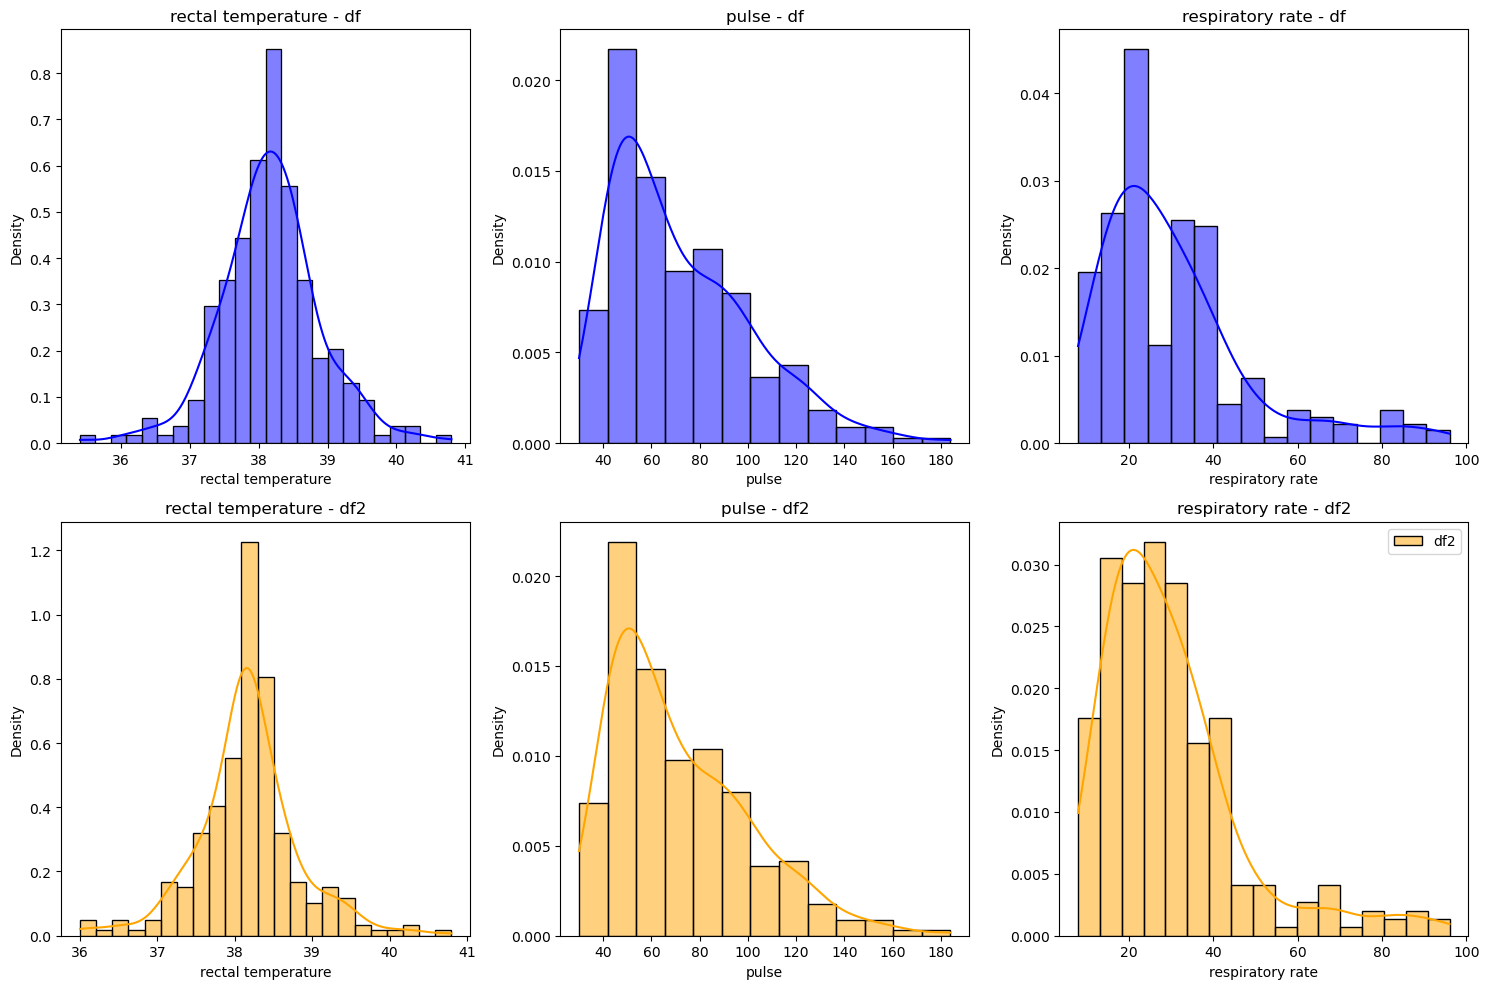

In [29]:
import seaborn as sns

# Список интересующих столбцов
columns = ['rectal temperature', 'pulse', 'respiratory rate']

# Настройка размера графиков
plt.figure(figsize=(15, 10))

# Перебираем все столбцы и строим диаграммы распределения
for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, color='blue', label='df', stat='density')
    plt.title(f'{col} - df')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.subplot(2, 3, i + 4)
    sns.histplot(df2[col].dropna(), kde=True, color='orange', label='df2', stat='density')
    plt.title(f'{col} - df2')
    plt.xlabel(col)
    plt.ylabel('Density')

# Настройка отображения легенды и компоновки графиков
plt.tight_layout()
plt.legend()
plt.show()

Как видно на графиках, форма распределения практически не изменилась.